In [ ]:
#Task 3: Sales Prediction Using Python

#Intern : Sonar Bhakti Sunil
    
#Batch  : September P1


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
data=pd.read_csv("C:/Users/Admin/Desktop/ALL folders/Internships/Oasis Infobyte/Data set/Sales prediction.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
data.shape

(200, 5)

In [4]:
data.size

1000

In [5]:
data.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [6]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [8]:
# basic info about the data type

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
data.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [11]:
data.describe

<bound method NDFrame.describe of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [12]:
data=data.drop(columns=['Unnamed: 0'])
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [13]:
#summary statistics

In [14]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
# data visualization

<AxesSubplot:>

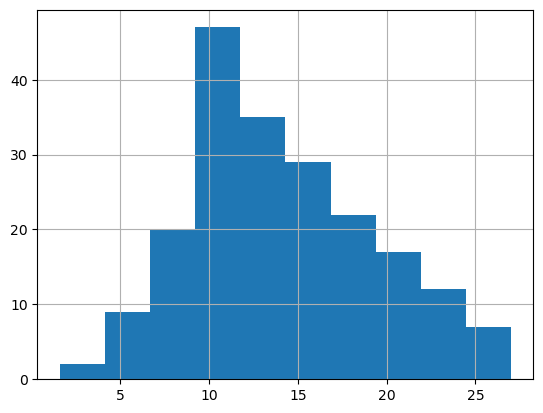

In [16]:
data['Sales'].hist()

In [17]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


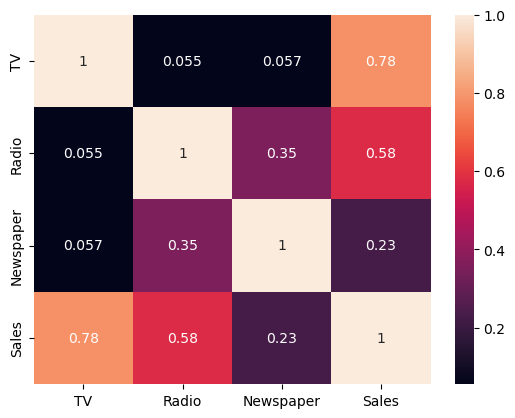

In [18]:
sns.heatmap(data.corr(),annot=True)
plt.show()

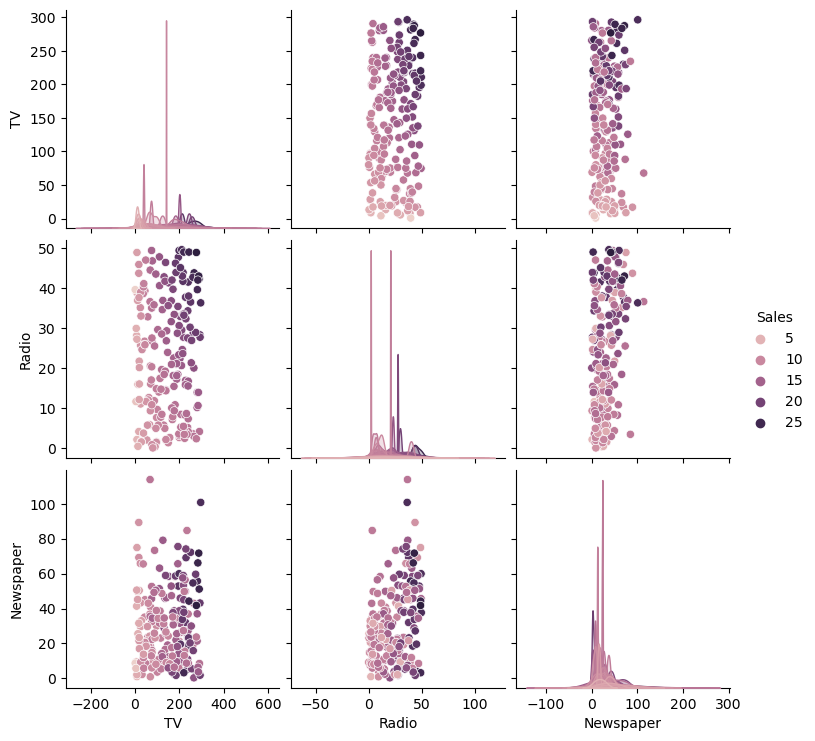

In [19]:
sns.pairplot(data,hue='Sales')

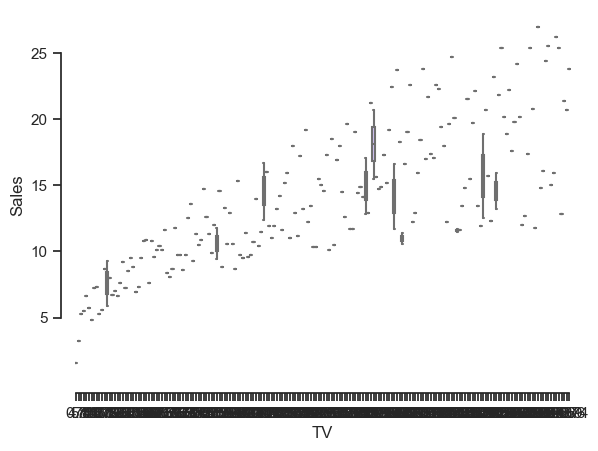

In [20]:
sns.set_theme(style='ticks',palette="pastel")
sns.boxplot(x="TV",y="Sales",palette=["m","g"],data=data)
sns.despine(offset=10,trim=True)

In [21]:
# Model Training

In [22]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['Sales'])
Y=data['Sales']
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.30)

In [23]:
print(X.shape)
print(x_train.shape)
print(x_test.shape)

(200, 3)
(140, 3)
(60, 3)


In [24]:
x_train

,TV,Radio,Newspaper
75,16.9,43.7,89.4
81,239.8,4.1,36.9
55,198.9,49.4,60.0
80,76.4,26.7,22.3
145,140.3,1.9,9.0
...,...,...,...
38,43.1,26.7,35.1
142,220.5,33.2,37.9
186,139.5,2.1,26.6
197,177.0,9.3,6.4


In [25]:
y_train

75      8.7
81     12.3
55     23.7
80     11.8
145    10.3
       ... 
38     10.1
142    20.1
186    10.3
197    12.8
56      5.5
Name: Sales, Length: 140, dtype: float64

In [26]:
x_test

,TV,Radio,Newspaper
153,171.3,39.7,37.7
98,289.7,42.3,51.2
1,44.5,39.3,45.1
187,191.1,28.7,18.2
113,209.6,20.6,10.7
78,5.4,29.9,9.4
188,286.0,13.9,3.7
82,75.3,20.3,32.5
14,204.1,32.9,46.0
5,8.7,48.9,75.0


In [27]:
y_test

153    19.0
98     25.4
1      10.4
187    17.3
113    15.9
78      5.3
188    15.9
82     11.3
14     19.0
5       7.2
0      22.1
20     18.0
12      9.2
33     17.4
163    18.0
58     23.8
85     15.2
107     8.7
2       9.3
44      8.5
127     8.8
139    20.7
96     11.7
39     21.5
105    19.2
23     15.5
161    13.3
173    11.7
166     8.0
120    15.5
37     14.7
193    19.6
170     8.4
116    12.2
154    15.6
118    15.9
18     11.3
129     9.7
57     13.2
190    10.8
179    12.6
185    22.6
74     17.0
53     21.2
177    11.7
122    11.6
26     15.0
167    12.2
115    12.6
157    10.1
4      12.9
106     7.2
155     3.2
60      8.1
65      9.3
70     18.3
121     7.0
168    17.1
137    20.8
133    19.6
Name: Sales, dtype: float64

In [28]:
#Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model=LinearRegression()

In [31]:
model.fit(x_train,y_train)

LinearRegression()

In [32]:
y_predict=model.predict(x_test)
y_predict

array([18.31149097, 24.02612905, 12.65531811, 17.05174469, 16.2973675 ,
        9.11164276, 18.36176388, 10.33212549, 18.43970302, 12.94122879,
       20.53466094, 18.06340847, 10.93393792, 18.6442623 , 17.40366054,
       21.96556524, 15.15606289,  7.1249214 , 12.73402856,  9.16944052,
        6.61647539, 19.71876039, 12.45942103, 20.41876711, 18.14081376,
       16.40588267, 13.79135152, 11.8720106 , 11.15322362, 14.49579767,
       15.93893714, 18.55480836,  7.533564  , 11.98196679, 15.43473369,
       15.7676793 , 10.10083504,  8.03615047, 12.79725841, 12.77929066,
       12.31057494, 20.83744747, 17.23896893, 20.06900927, 12.08917713,
       13.40929493, 15.04629521, 13.19475157, 13.17047274,  9.93235386,
       13.13878   ,  6.31862589,  5.51241389,  5.83001227,  7.92255559,
       17.77375575,  8.11888737, 17.13838989, 20.72971263, 19.2465689 ])

In [33]:
print("Accuracy:",model.score(x_train,y_train)*100)

Accuracy: 89.28951654474898


In [34]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 90.43651343236661


In [35]:
#Analysing data by scatterplot

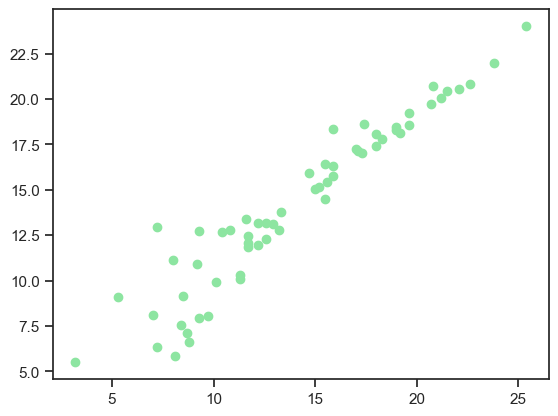

In [36]:
plt.scatter(y_test,y_predict,c='g')

In [37]:
mean_squared_error(y_test,y_predict)

2.4084713793692427

In [38]:
mean_absolute_error(y_test,y_predict)

1.1425942755879317

In [39]:
r2_score(y_test,y_predict)*100

90.43651343236661

In [40]:
#K-Fold cross validation

In [41]:
CV=KFold(n_splits=10,shuffle=True,random_state=0)
CV

KFold(n_splits=10, random_state=0, shuffle=True)

In [42]:
score=cross_val_score(model,X,Y,cv=CV,n_jobs=-1)
finalscore=np.mean(score)
finalscore

0.886401020337965